In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


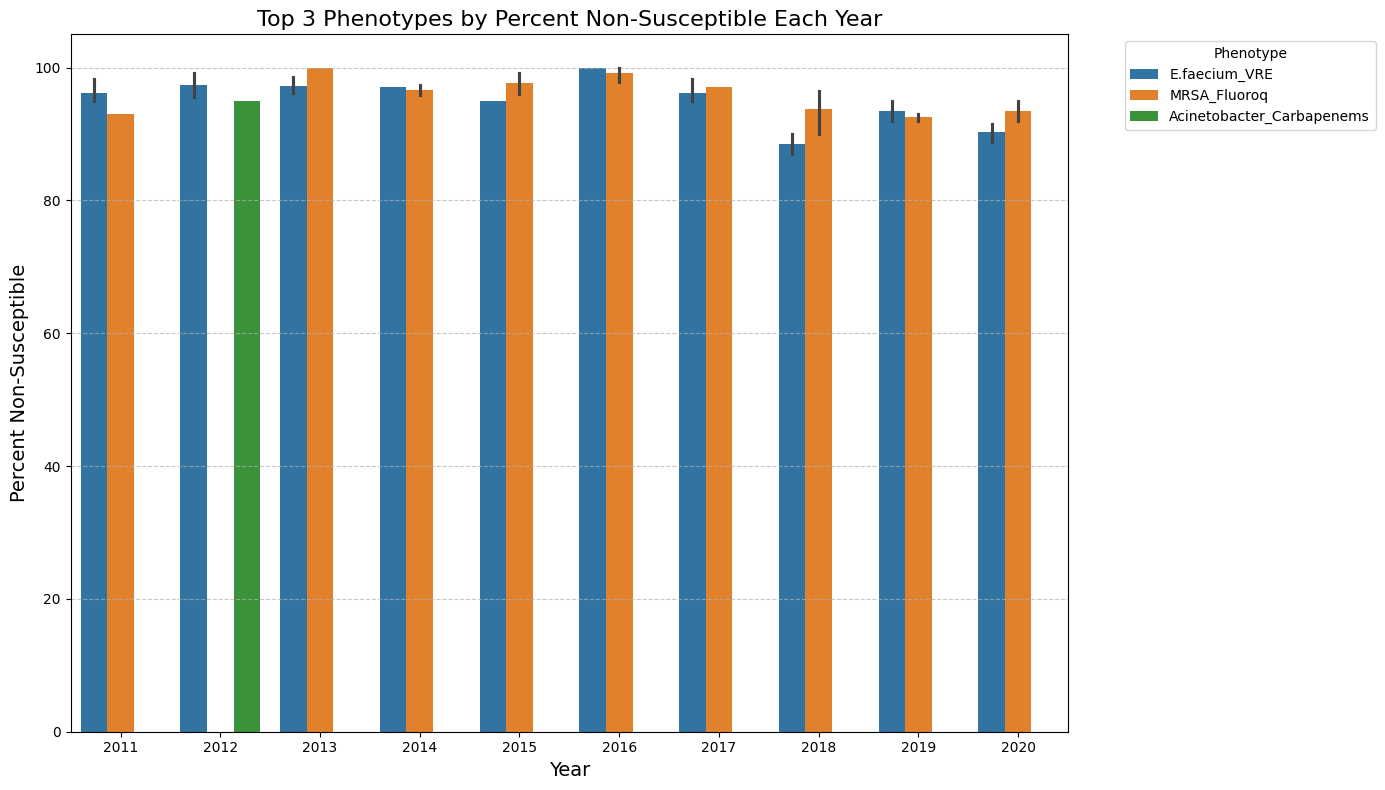

In [5]:

# Load the dataset
df = pd.read_csv('updated_resistance.csv')

# For each year, get the top 6 phenotypes with the highest pctNonSuscep
top_n_pheno = df.groupby('year').apply(lambda x: x.nlargest(6, 'pctNonSuscep')).reset_index(drop=True)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(
    x='year', 
    y='pctNonSuscep', 
    hue='phenotype', 
    data=top_n_pheno, 
    dodge=True
)

# Customize the plot
plt.title('Top 3 Phenotypes by Percent Non-Susceptible Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percent Non-Susceptible', fontsize=14)
plt.legend(title='Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

In [ ]:
# Load the dataset
resistance_full = pd.read_csv('updated_resistance.csv')

top3 = resistance_full['phenotype_id'].isin([1, 8, 21])

top3_resistant_phenotype = resistance_full[top3]
other_reistant_phenotype = resistance_full[~top3]

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
random_state=123)

for train_indices, test_indices in splitter.split(top3_resistant_phenotype,
top3_resistant_phenotype['r_present']):
    
    train_set = top3_resistant_phenotype.iloc[train_indices]
test_set = top3_resistant_phenotype.iloc[test_indices]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Correct column names
X = train_set[['eventtype_id', 'agecat_id', 'phenotype_id', 'state_id']] 
y = train_set['r_present']

X_test = test_set[['eventtype_id', 'agecat_id', 'phenotype_id', 'state_id']]  
y_test = test_set['r_present']

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier()

# Fit the model to the training data
tree_model.fit(X, y)

# Predict using the trained model
y_pred = tree_model.predict(X)

# Results for decision tree on training data
print('Results for decision tree on training data')
print('   Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))  # Specify averaging method
print('Recall is    ', recall_score(y, y_pred, average='weighted'))  # Specify averaging method
print('F1 is        ', f1_score(y, y_pred, average='weighted'))  # Specify averaging method

In [ ]:
y_test_pred = tree_model.predict(X_test)

print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix ")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is  ', precision_score(y_test, y_test_pred))
print('Recall is  ', recall_score(y_test, y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

| Model           | Training Features               | Set      | Accuracy | F1    |
| :---            | :---                            | :---     | :---     | :---  |
| Decision Tree   | Event Type, Age, Phenotype, State | Training | 96.85   | 96.84 |
| Decision Tree   | Event Type, Age, Phenotype, State | Test     | 95.71    | 84.52 |

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=['eventtype_id', 'agecat_id', 'phenotype_id', 'state_id'], class_names=['0', '1'], filled=True)
plt.show()
